# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [352]:

import pandas as pd

df = pd.read_csv('/Users/Yu/Documents/GitHub/ml-project-supervised-learning/diabetes.csv')
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [316]:
df.shape

(768, 9)

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [318]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [319]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [320]:
df.groupby('Outcome').agg({'Age':'mean', 'Glucose':'mean', 'BMI':'mean', "Pregnancies":"mean"})

,Age,Glucose,BMI,Pregnancies
Outcome,,,,
0,31.190000,109.980000,30.304200,3.298000
1,37.067164,141.257463,35.142537,4.865672


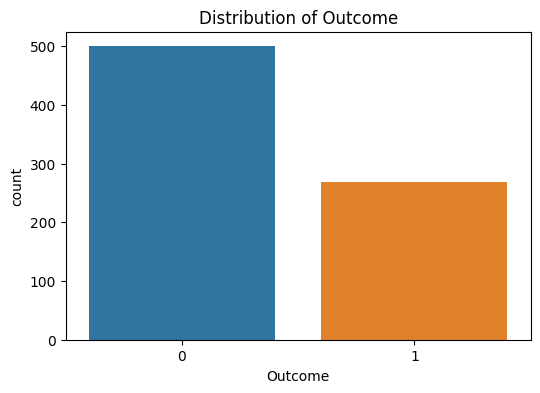

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Outcome distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Outcome")
plt.title("Distribution of Outcome")
plt.show()


From the above distribution of outcome, we can see the data is imbalanced. In order to get an unbias prediction, we need to handle the imbalanced data before training the model.

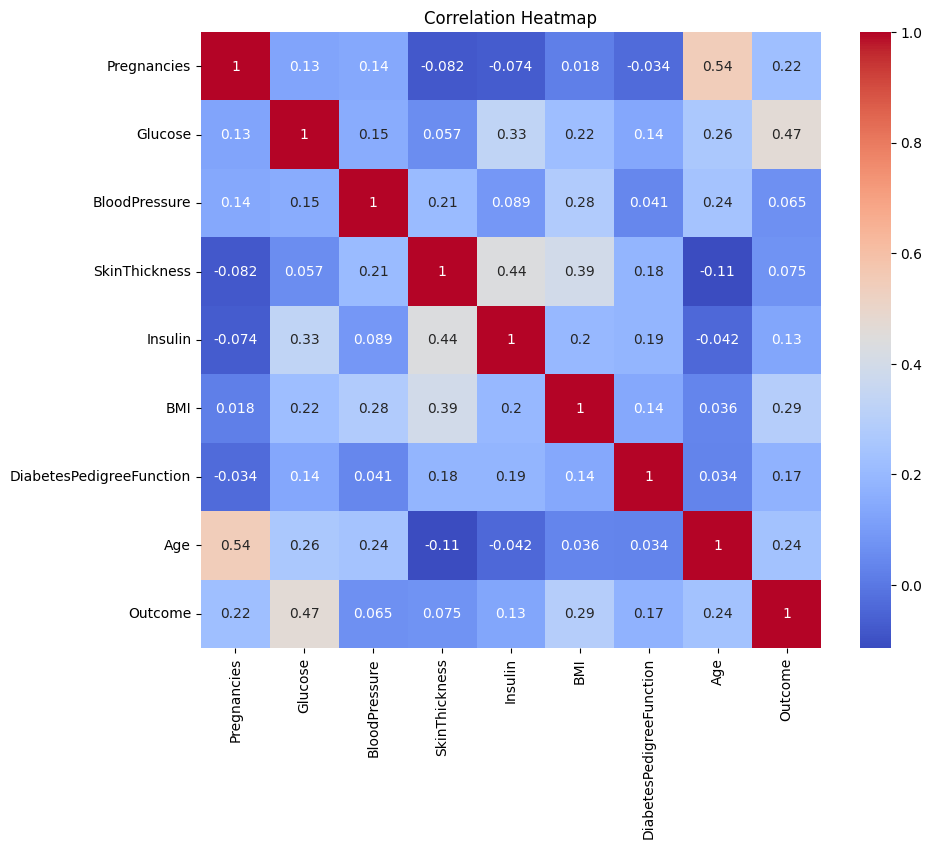

In [322]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

From the above correalation heatmap, we can see Glucose (0.47) has a strong positive relationship with the outcome, BMI, pregenancies and age are also import features to predict the outcome. We may remove the unimport features to get a more accurate predict when train the models.

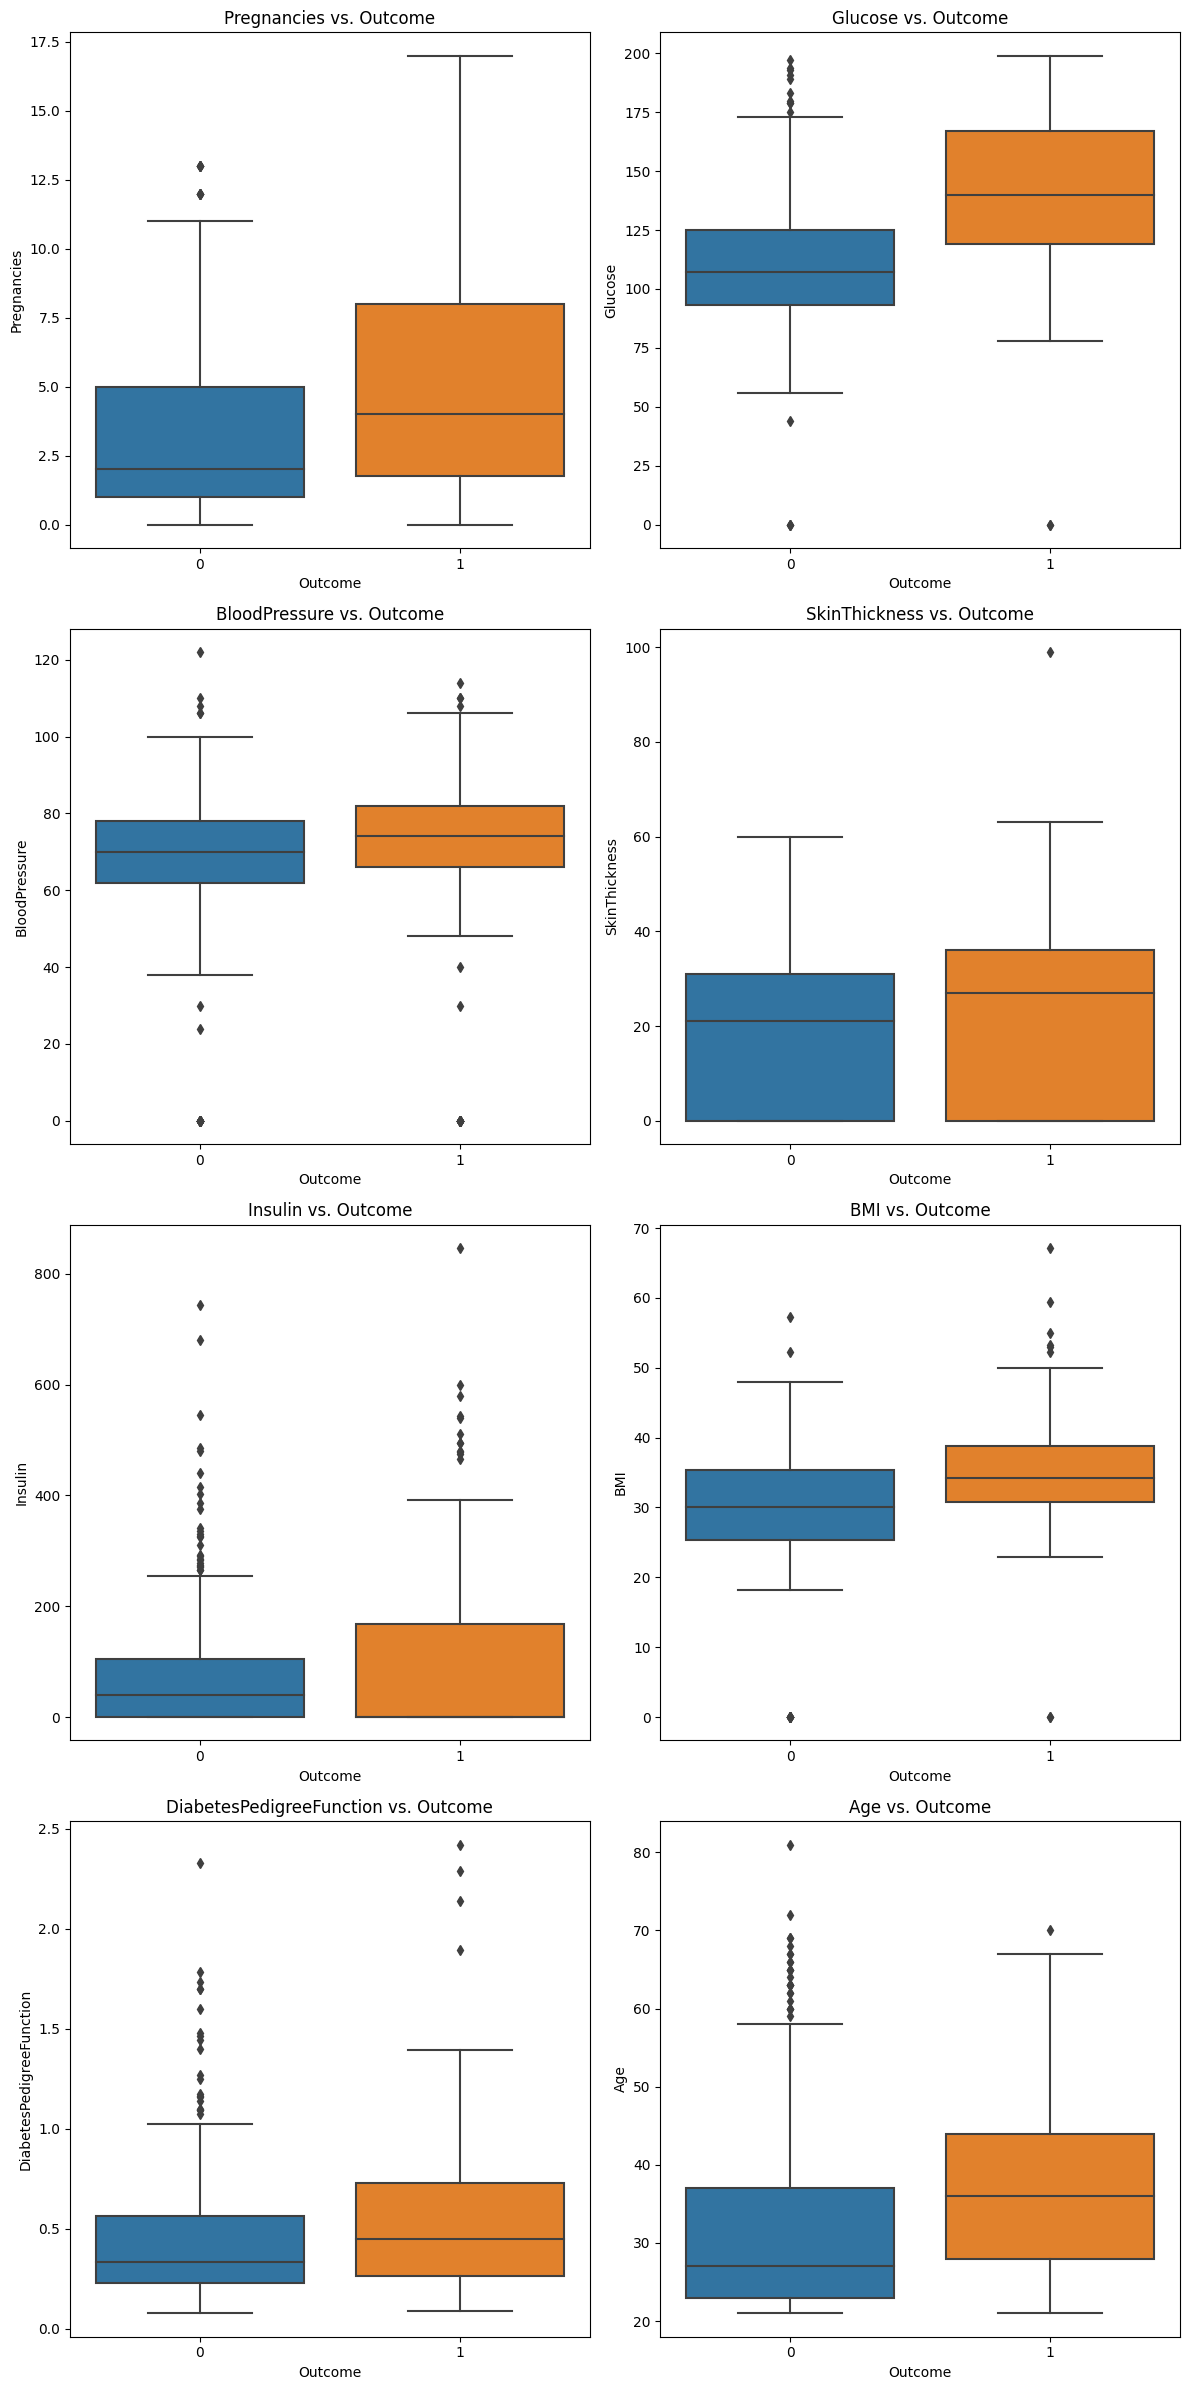

In [323]:
import seaborn as sns

# Select predictor variables for boxplots
predictor_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Calculate the number of rows needed based on the number of predictor variables
num_rows = (len(predictor_variables) + 1) // 2  # Add 1 to ensure we get enough rows for odd number of variables

# Create subplots for boxplots with two columns
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create side-by-side boxplots for each predictor variable based on Outcome
for i, variable in enumerate(predictor_variables):
    sns.boxplot(data=df, x="Outcome", y=variable, ax=axes[i])
    axes[i].set_title(f"{variable} vs. Outcome")

plt.tight_layout()
plt.show()


From the above boxplot between each variable and the outcome, we can see the outliers. So we have to handle these outliers before traning the model.

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [353]:
# From df.describe() we can see the minimum values of Glucose, BloodPressure, SkinRhickness, Insulin, and BMI are 0 which does not make sense. 
# This indicates missing values exist in those columns. Here we replace 0 in these columns by NaN.

import numpy as np
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [354]:
# Check missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [355]:
# Fill missing values with the median values of each variable

df_filled = df.fillna(df.median())
df = df_filled
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [356]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [357]:
# Handling outliers using IQR-based approach

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [358]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
    else: 
        print(variable, "no")

In [359]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [360]:
for col in df.columns: 
    has_outliers(df,col)

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [361]:
replace_with_thresholds(df, df.columns)

In [362]:
for col in df.columns:
    has_outliers(df, col)

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [363]:
# Feature engineering

df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1.0,Obese
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0.0,Overweight
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1.0,Normal
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0.0,Overweight
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1.0,Obese
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,42.5,135.875,32.9,0.171,63.0,0.0,Obese
764,2.0,122.0,70.0,27.0,125.000,36.8,0.340,27.0,0.0,Obese
765,5.0,121.0,72.0,23.0,112.875,26.2,0.245,30.0,0.0,Overweight
766,1.0,126.0,60.0,29.0,125.000,30.1,0.349,47.0,1.0,Obese


In [364]:
# One-hot encoding BMI_Category
df_encoded = pd.get_dummies(df, columns=['BMI_Category'], prefix=['BMI']).astype(float)
columns_to_convert = ['Pregnancies', 'Age', 'Outcome', 'BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']
df_encoded[columns_to_convert] = df_encoded[columns_to_convert].astype(int)
df= df_encoded
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Underweight,BMI_Normal,BMI_Overweight,BMI_Obese
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50,1,0,0,0,1
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31,0,0,0,1,0
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32,1,0,1,0,0
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21,0,0,0,1,0
4,0,137.0,40.0,35.0,135.875,43.1,1.200,33,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,42.5,135.875,32.9,0.171,63,0,0,0,0,1
764,2,122.0,70.0,27.0,125.000,36.8,0.340,27,0,0,0,0,1
765,5,121.0,72.0,23.0,112.875,26.2,0.245,30,0,0,0,1,0
766,1,126.0,60.0,29.0,125.000,30.1,0.349,47,1,0,0,0,1


In [365]:
categorical_df = df[['BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese']]
categorical_df.head()

,BMI_Underweight,BMI_Normal,BMI_Overweight,BMI_Obese
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,1


In [366]:
y = df['Outcome']
X = df.drop(['Outcome', 'BMI_Underweight', 'BMI_Normal', 'BMI_Overweight', 'BMI_Obese'], axis=1)
cols = X.columns
index = X.index
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.000,33.6,0.627,50
1,1,85.0,66.0,29.0,125.000,26.6,0.351,31
2,8,183.0,64.0,29.0,125.000,23.3,0.672,32
3,1,89.0,66.0,23.0,112.875,28.1,0.167,21
4,0,137.0,40.0,35.0,135.875,43.1,1.200,33


In [367]:
# Scaling
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.649356,0.866045,-0.030632,0.824667,0.039062,0.181092,0.588927,1.448274
1,-0.850059,-1.205066,-0.543914,0.017945,0.039062,-0.869465,-0.378101,-0.189071
2,1.249122,2.016662,-0.715008,0.017945,0.039062,-1.364728,0.746595,-0.102895
3,-0.850059,-1.073567,-0.543914,-0.788777,-1.494110,-0.644346,-1.022787,-1.050832
4,-1.149942,0.504422,-2.768136,0.824667,1.414175,1.606849,2.596563,-0.016719


In [368]:
X = pd.concat([X,categorical_df], axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,BMI_Underweight,BMI_Normal,BMI_Overweight,BMI_Obese
0,0.649356,0.866045,-0.030632,0.824667,0.039062,0.181092,0.588927,1.448274,0,0,0,1
1,-0.850059,-1.205066,-0.543914,0.017945,0.039062,-0.869465,-0.378101,-0.189071,0,0,1,0
2,1.249122,2.016662,-0.715008,0.017945,0.039062,-1.364728,0.746595,-0.102895,0,1,0,0
3,-0.850059,-1.073567,-0.543914,-0.788777,-1.494110,-0.644346,-1.022787,-1.050832,0,0,1,0
4,-1.149942,0.504422,-2.768136,0.824667,1.414175,1.606849,2.596563,-0.016719,0,0,0,1


In [369]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [341]:
# Handle imbalanced data
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Apply random undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Replace the data with resampled data
df = pd.concat([X_resampled, y_resampled], axis=1)



# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [370]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Extract values from confusion matrix
tn_logreg, fp_logreg, fn_logreg, tp_logreg = confusion_matrix_logreg.ravel()
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix_rf.ravel()

# Calculate Type 1 Error (False Positive Rate)
fpr_logreg = fp_logreg / (fp_logreg + tn_logreg)
fpr_rf = fp_rf / (fp_rf + tn_rf)

# Calculate Type 2 Error (False Negative Rate)
fnr_logreg = fn_logreg / (fn_logreg + tp_logreg)
fnr_rf = fn_rf / (fn_rf + tp_rf)

# Report
report_logreg = classification_report(y_test, y_pred_logreg)
report_rf = classification_report(y_test, y_pred_rf)


print("Type 1 Error (False Positive Rate):")
print("Logistic Regression:", fpr_logreg)
print("Random Forest:", fpr_rf)

print("\nType 2 Error (False Negative Rate):")
print("Logistic Regression:", fnr_logreg)
print("Random Forest:", fnr_rf)

print("\nClassification Report logreg:", report_logreg)
print("Classification Report rf:", report_rf)



Type 1 Error (False Positive Rate):
Logistic Regression: 0.2222222222222222
Random Forest: 0.18181818181818182

Type 2 Error (False Negative Rate):
Logistic Regression: 0.32727272727272727
Random Forest: 0.2909090909090909

Classification Report logreg:               precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

Classification Report rf:               precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [380]:
# Model tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.1], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid Search for Logistic Regression
grid_logreg = GridSearchCV(estimator=LogisticRegression(max_iter=500), param_grid=param_grid, scoring='f1', cv=5)
grid_logreg.fit(X_train, y_train)

# Get best hyperparameters and models
best_params_logreg = grid_logreg.best_params_
best_model_logreg = grid_logreg.best_estimator_

print("best_params_logreg:", best_params_logreg)
print("best_model_logreg:", best_model_logreg)


best_params_logreg: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
best_model_logreg: LogisticRegression(C=0.001, max_iter=500, solver='liblinear')


In [381]:
# Final Logistic Regression Model
logreg_tuned = LogisticRegression(**best_params_logreg)
logreg_tuned = logreg_tuned.fit(X_train,y_train)

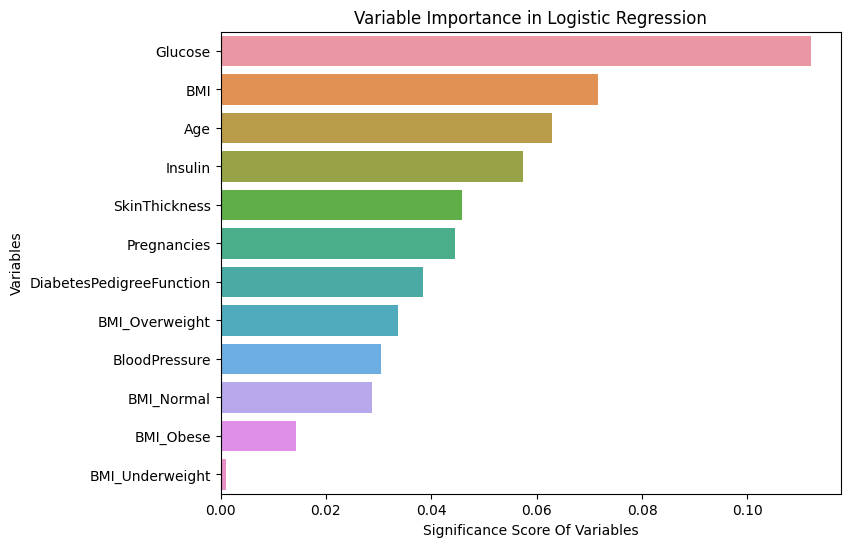

In [373]:
# Calculate feature importance based on coefficients
feature_importance = np.abs(logreg_tuned.coef_[0])
feature_names = X.columns

# Create a pandas Series for visualization
feature_imp = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance in Logistic Regression")
plt.show()

In [383]:
# Random Forest Tuning
rf_params = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [2, 5, 10],   
    'min_samples_split': [10, 15, 20],  
    'min_samples_leaf': [1, 2, 3]     
}

# Create GridSearchCV object
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=rf_params, scoring='f1', cv=5)
grid_rf.fit(X_train, y_train)

# Get best hyperparameters and model
best_params_rf = grid_rf.best_params_
best_model_rf = grid_rf.best_estimator_

print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Random Forest Model:", best_model_rf)

Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest Model: RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)


In [384]:
# Final Rnadom Forest Model

rf_tuned = RandomForestClassifier(**best_params_rf)
rf_tuned = rf_tuned.fit(X_train,y_train)


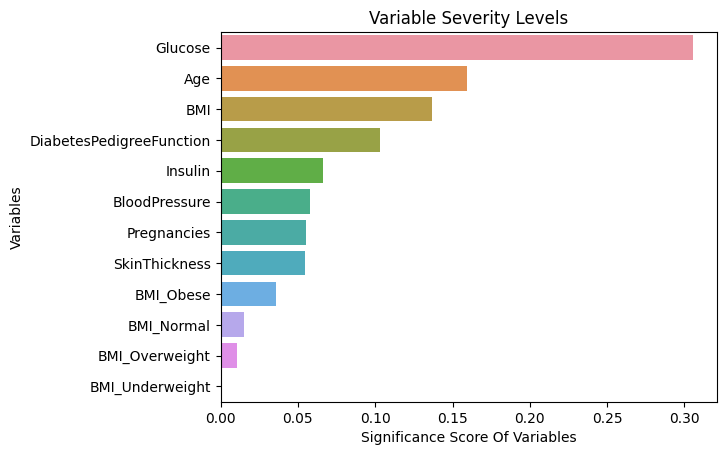

In [376]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

In [385]:
y_pred_logreg_tuned = best_model_logreg.predict(X_test)
y_pred_rf_tuned = best_model_rf.predict(X_test)

# Confusion Matrix
confusion_matrix_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned)
confusion_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

# Extract values from confusion matrix
tn_logreg_tuned, fp_logreg_tuned, fn_logreg_tuned, tp_logreg_tuned = confusion_matrix_logreg_tuned.ravel()
tn_rf_tuned, fp_rf_tuned, fn_rf_tuned, tp_rf_tuned = confusion_matrix_rf_tuned.ravel()

# Calculate Type 1 Error (False Positive Rate)
fpr_logreg_tuned = fp_logreg_tuned / (fp_logreg_tuned + tn_logreg_tuned)
fpr_rf_tuned = fp_rf_tuned / (fp_rf_tuned + tn_rf_tuned)

# Calculate Type 2 Error (False Negative Rate)
fnr_logreg_tuned = fn_logreg_tuned / (fn_logreg_tuned + tp_logreg_tuned)
fnr_rf_tuned = fn_rf_tuned / (fn_rf_tuned + tp_rf_tuned)

# Report
report_logreg_tuned = classification_report(y_test, y_pred_logreg_tuned)
report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

print("Type 1 Error (False Positive Rate):")
print("Logistic Regression:", fpr_logreg_tuned)
print("Random Forest:", fpr_rf_tuned)

print("\nType 2 Error (False Negative Rate):")
print("Logistic Regression:", fnr_logreg_tuned)
print("Random Forest:", fnr_rf_tuned)

print("\nClassification Report logreg:", report_logreg_tuned)
print("Classification Report rf:", report_rf_tuned)

Type 1 Error (False Positive Rate):
Logistic Regression: 0.2727272727272727
Random Forest: 0.1919191919191919

Type 2 Error (False Negative Rate):
Logistic Regression: 0.32727272727272727
Random Forest: 0.36363636363636365

Classification Report logreg:               precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

Classification Report rf:               precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Logistic Regression and Random Forest were developed as predictive models for diabetes outcome. The base Random Forest model shows a better F1 score with less Type1 and Type2 errors. I tried to tune both the model and the Fi scores and Type1, Type2 error are worse than the original model, so the original Random Forest model is the best model for predicting diabetes in my analysis.
2. Based on the correlation heatmap, Glucose is the most siginificant predictor of disbetes outcome. Also, age, BMI and pregnancy play important roles.
3. Proper preprocessing steps, including feature scaling, one-hot-encoding significantly improved the model's performance in this case.
4. The dataset shows an imbalanced distribution, with a higher number of non-diabetic cases compared to diabetic cases.